In [20]:
import pandas as pd
from datetime import datetime

def parse_log_file(file_path):
    with open(file_path, 'r') as f:
        content = f.read()
    
    entries = content.strip().split('----------------------------------------\n')
    data_list = []
    
    for entry in entries:
        entry = entry.strip()
        if not entry:
            continue
        
        data = {}
        lines = entry.split('\n')
        
        for line in lines:
            line = line.strip()
            if not line or ':' not in line:  # Skip empty lines or lines without a colon
                continue
            
            # Split into key and value
            key_part, value_part = line.split(':', 1)
            key = key_part.strip()
            value = value_part.strip()
            
            # Process relevant keys
            if key == 'Local Time is':
                # Fix timezone offset format (e.g., "+03" -> "+0300")
                parts = value.split()
                tz = parts[-1]
                if len(tz) == 3:
                    tz += "00"
                    adjusted_value = " ".join(parts[:-1] + [tz])
                else:
                    adjusted_value = value
                dt = datetime.strptime(adjusted_value, "%a %b %d %H:%M:%S %Y %z")
                data['Local Time'] = dt.strftime("%d.%m.%Y")
            elif key == 'Temperature':
                data['Temperature'] = int(value.split()[0])
            elif key == 'Percentage Used':
                data['Percentage used'] = int(value.replace('%', ''))
            elif key == 'Data Units Read':
                tb_value = value.split('[')[1].split()[0]
                data['Data Units Read (TB)'] = float(tb_value)
            elif key == 'Data Units Written':
                tb_value = value.split('[')[1].split()[0]
                data['Data Units Written (TB)'] = float(tb_value)
        
        data_list.append(data)
    
    df = pd.DataFrame(data_list, columns=[
        'Local Time', 'Temperature', 'Percentage used', 
        'Data Units Read (TB)', 'Data Units Written (TB)'
    ])
    return df

# Usage
df = parse_log_file('smartctl_daily.log')
print(df)

    Local Time  Temperature  Percentage used  Data Units Read (TB)  \
0   19.12.2024           26                4                  2.08   
1   20.12.2024           28                4                  2.09   
2   21.12.2024           28                4                  2.09   
3   22.12.2024           26                4                  2.09   
4   23.12.2024           27                4                  2.09   
5   24.12.2024           26                4                  2.09   
6   25.12.2024           27                4                  2.10   
7   26.12.2024           27                4                  2.10   
8   27.12.2024           26                4                  2.10   
9   28.12.2024           26                4                  2.10   
10  29.12.2024           27                4                  2.10   
11  30.12.2024           26                4                  2.10   
12  31.12.2024           26                4                  2.11   
13  01.01.2025      

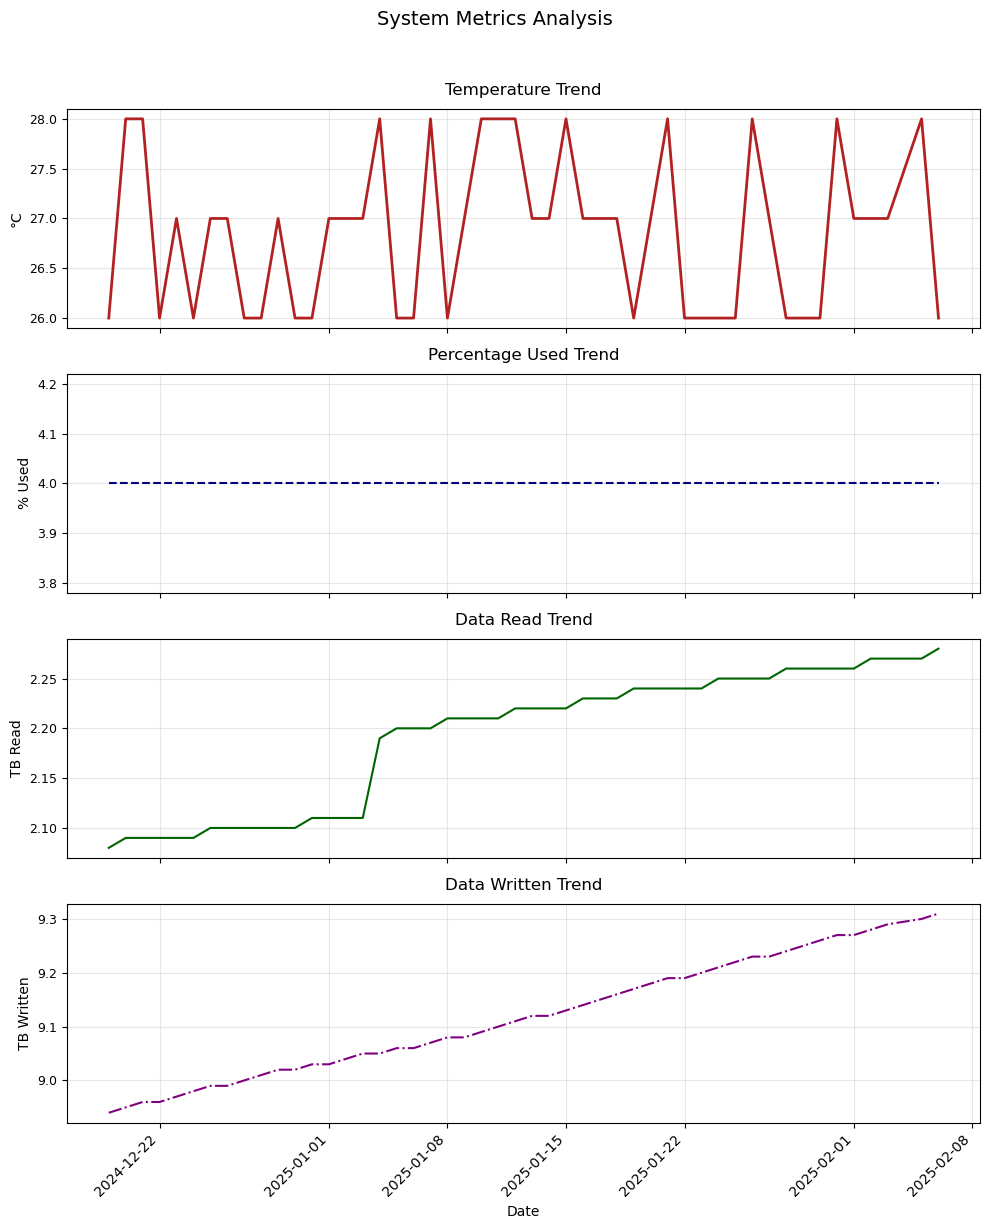

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data (if not already loaded)
# df = parse_log_file('smartctl_daily.log')

# Convert to datetime and sort
df['Local Time'] = pd.to_datetime(df['Local Time'], format='%d.%m.%Y')
df = df.sort_values('Local Time').set_index('Local Time')

# Create individual plots
fig, axs = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
plt.suptitle('System Metrics Analysis', y=1.02, fontsize=14)

# Temperature Plot
axs[0].plot(df.index, df['Temperature'], color='firebrick', linewidth=2)  # Removed marker
axs[0].set_title('Temperature Trend', pad=10)
axs[0].set_ylabel('°C', fontsize=10)
axs[0].grid(True, alpha=0.3)
axs[0].tick_params(axis='y', labelsize=9)

# Percentage Used Plot
axs[1].plot(df.index, df['Percentage used'], color='navy', linestyle='--')  # Removed marker
axs[1].set_title('Percentage Used Trend', pad=10)
axs[1].set_ylabel('% Used', fontsize=10)
axs[1].grid(True, alpha=0.3)
axs[1].tick_params(axis='y', labelsize=9)

# Data Read Plot
axs[2].plot(df.index, df['Data Units Read (TB)'], color='darkgreen')  # Removed marker
axs[2].set_title('Data Read Trend', pad=10)
axs[2].set_ylabel('TB Read', fontsize=10)
axs[2].grid(True, alpha=0.3)
axs[2].tick_params(axis='y', labelsize=9)

# Data Written Plot
axs[3].plot(df.index, df['Data Units Written (TB)'], color='purple', linestyle='-.')  # Removed marker
axs[3].set_title('Data Written Trend', pad=10)
axs[3].set_ylabel('TB Written', fontsize=10)
axs[3].grid(True, alpha=0.3)
axs[3].tick_params(axis='y', labelsize=9)

# Format x-axis
plt.xlabel('Date', fontsize=10)
fig.autofmt_xdate(rotation=45)
plt.tight_layout()

# Save and show
plt.savefig('individual_metrics_no_markers.png', dpi=300, bbox_inches='tight')
plt.show()